<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EB%B0%9C%EB%B3%91_%ED%9B%84_%EB%82%B4%EC%9B%90%EC%8B%9C%EA%B0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 내원시간과 마찬가지로 20~21년은 남여 통계 없음

In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,945 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
df_time = pd.read_csv('/content/drive/MyDrive/BigData/발병+후+응급실+도착+소요시간+현황_20241106194700.csv')
df_time_new = df_time.drop(['연령별(1)','연령별(2)','성별(1)','2014','2015','2016','2017','2018','2019','2020','2021'],axis=1)
df_time_new = df_time_new.drop([35,36,37],axis=0)
df_time_new

,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2015.1,...,2020.9,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,계,계,계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,12-24시간,24시간이상,미상/미입력,30분미만,...,미상/미입력,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,12-24시간,24시간이상,미상/미입력
2,131423,319257,135643,78965,55240,78141,127967,403988,5074,121894,...,2344,81136,265186,116160,65310,44838,66877,114096,335898,2344
3,72483,168700,66859,38390,26696,38139,62540,204585,2665,67212,...,1442,43212,137511,56395,31138,21549,33438,56576,169189,1442
4,58940,150557,68784,40575,28544,40002,65427,199403,2409,54682,...,902,37924,127675,59765,34172,23289,33439,57520,166709,902
5,3351,8290,4382,2828,2047,3189,5827,16185,257,2891,...,15,1181,4110,1860,985,723,1068,1809,4854,15
6,1817,4584,2406,1555,1142,1802,3271,9089,152,1582,...,-,-,-,-,-,-,-,-,-,-
7,1534,3706,1976,1273,905,1387,2556,7096,105,1309,...,-,-,-,-,-,-,-,-,-,-
8,27423,60343,24979,14252,9805,15017,27864,69673,1021,23632,...,43,9656,30065,10993,4962,3156,4367,9082,20358,43
9,16534,35943,14267,8030,5495,8505,15430,38364,579,14107,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
# 결측치 처리
from sklearn.impute import KNNImputer

# 문자열 항목들 따로 빼놨다가 합치기
val = df_time_new[0:2]
df_time_new.drop([0,1],axis=0,inplace=True)
df_time_new.replace('-', np.nan, inplace=True)

# Imputuation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_time_new), columns=df_time_new.columns)
df_imputed

# 위에서 따로 빼놓은 문자열 항목들과 합치기
df_imputed = pd.concat([val, df_imputed], ignore_index=True)
df_imputed

,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,2014.8,2014.9,2015.1,...,2020.9,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,계,계,계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,12-24시간,24시간이상,미상/미입력,30분미만,...,미상/미입력,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,12-24시간,24시간이상,미상/미입력
2,131423.0,319257.0,135643.0,78965.0,55240.0,78141.0,127967.0,403988.0,5074.0,121894.0,...,2344.0,81136.0,265186.0,116160.0,65310.0,44838.0,66877.0,114096.0,335898.0,2344.0
3,72483.0,168700.0,66859.0,38390.0,26696.0,38139.0,62540.0,204585.0,2665.0,67212.0,...,1442.0,43212.0,137511.0,56395.0,31138.0,21549.0,33438.0,56576.0,169189.0,1442.0
4,58940.0,150557.0,68784.0,40575.0,28544.0,40002.0,65427.0,199403.0,2409.0,54682.0,...,902.0,37924.0,127675.0,59765.0,34172.0,23289.0,33439.0,57520.0,166709.0,902.0
5,3351.0,8290.0,4382.0,2828.0,2047.0,3189.0,5827.0,16185.0,257.0,2891.0,...,15.0,1181.0,4110.0,1860.0,985.0,723.0,1068.0,1809.0,4854.0,15.0
6,1817.0,4584.0,2406.0,1555.0,1142.0,1802.0,3271.0,9089.0,152.0,1582.0,...,177.6,5081.4,18619.8,8798.0,5051.2,3506.6,5008.8,8526.2,29454.4,177.6
7,1534.0,3706.0,1976.0,1273.0,905.0,1387.0,2556.0,7096.0,105.0,1309.0,...,177.6,5081.4,18619.8,8798.0,5051.2,3506.6,5008.8,8526.2,29454.4,177.6
8,27423.0,60343.0,24979.0,14252.0,9805.0,15017.0,27864.0,69673.0,1021.0,23632.0,...,43.0,9656.0,30065.0,10993.0,4962.0,3156.0,4367.0,9082.0,20358.0,43.0
9,16534.0,35943.0,14267.0,8030.0,5495.0,8505.0,15430.0,38364.0,579.0,14107.0,...,261.6,8844.0,27317.6,11786.2,6685.4,4666.2,7317.0,12366.4,30621.2,261.6


In [ ]:
df_imputed = df_imputed.drop([0,1],axis=0)
df_imputed = df_imputed.drop(['2014.9','2015.9','2016.9','2017.9','2018.9','2019.9','2020.9','2021.9'],axis=1)
df_imputed = df_imputed.astype('float')

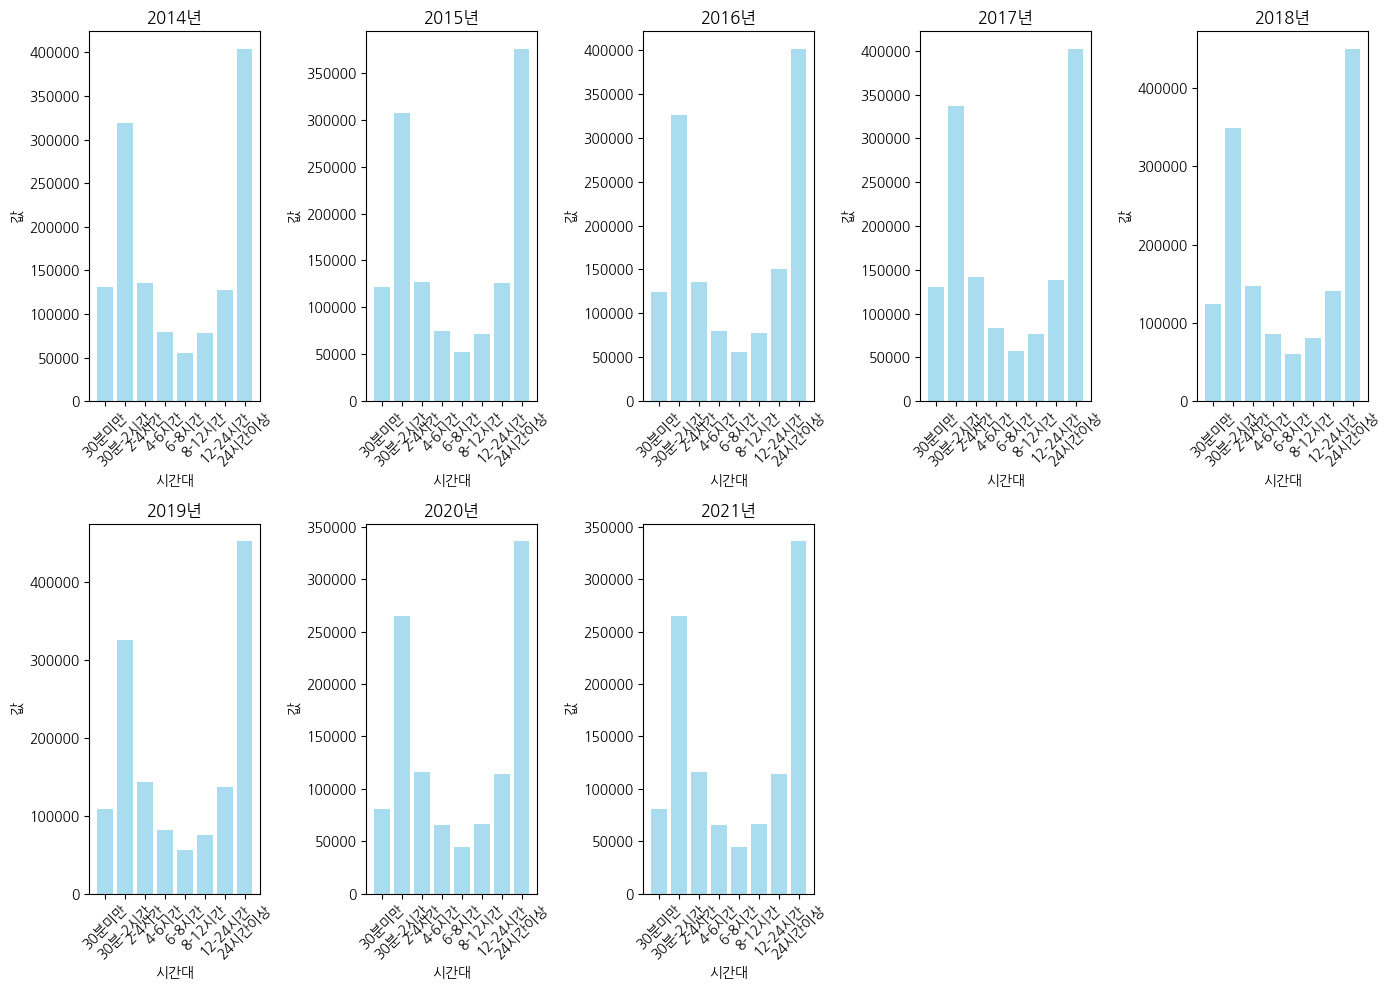

In [ ]:
df_filtered = df_imputed.iloc[0,:]

# x축 레이블 (시간대)
x_labels = ['30분미만', '30분-2시간', '2-4시간', '4-6시간', '6-8시간', '8-12시간', '12-24시간', '24시간이상']
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.rename(columns={'index':'도착시간'})
df_filtered

df_filtered["연도"] = df_filtered["도착시간"].str.split('.').str[0]
df_filtered["시간대"] = df_filtered["도착시간"].str.split('.').str[1]

# x_labels 정의
x_labels = ['30분미만', '30분-2시간', '2-4시간', '4-6시간', '6-8시간', '8-12시간', '12-24시간', '24시간이상']

# 연도별 데이터로 그룹화
grouped = df_filtered.groupby("연도")

# 시각화
plt.figure(figsize=(14, 10))

for i, (year, group) in enumerate(grouped):
    # 시간대를 x_labels 인덱스에 매핑
    group = group.set_index("시간대").reindex([str(i + 1) for i in range(len(x_labels))], fill_value=0)

    # 각 연도의 서브플롯
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.subplot(2, len(grouped) // 2 + 1, i + 1)
    plt.bar(x_labels, group[2], color='skyblue', alpha=0.7)
    plt.title(f"{year}년", fontsize=12)
    plt.xlabel("시간대", fontsize=10)
    plt.ylabel("값", fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df_time


,연령별(1),연령별(2),성별(1),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,연령별(1),연령별(2),성별(1),계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,연령별(1),연령별(2),성별(1),소계,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,...,소계,30분미만,30분-2시간,2-4시간,4-6시간,6-8시간,8-12시간,12-24시간,24시간이상,미상/미입력
2,합계,소계,계,1335698,131423,319257,135643,78965,55240,78141,...,1091845,81136,265186,116160,65310,44838,66877,114096,335898,2344
3,합계,소계,남자,681057,72483,168700,66859,38390,26696,38139,...,550450,43212,137511,56395,31138,21549,33438,56576,169189,1442
4,합계,소계,여자,654641,58940,150557,68784,40575,28544,40002,...,541395,37924,127675,59765,34172,23289,33439,57520,166709,902
5,합계,1세미만,계,46356,3351,8290,4382,2828,2047,3189,...,16605,1181,4110,1860,985,723,1068,1809,4854,15
6,합계,1세미만,남자,25818,1817,4584,2406,1555,1142,1802,...,-,-,-,-,-,-,-,-,-,-
7,합계,1세미만,여자,20538,1534,3706,1976,1273,905,1387,...,-,-,-,-,-,-,-,-,-,-
8,합계,1 - 9세,계,250377,27423,60343,24979,14252,9805,15017,...,92682,9656,30065,10993,4962,3156,4367,9082,20358,43
9,합계,1 - 9세,남자,143147,16534,35943,14267,8030,5495,8505,...,-,-,-,-,-,-,-,-,-,-
